In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, Normalizer, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.metrics import silhouette_score

In [98]:
df= pd.read_csv("D:\pyt\Assignment\Assignment 7-Clustering\crime_data.csv")

In [99]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [100]:
df1=df.drop("Unnamed: 0", axis=1)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Using stadardized data

In [101]:
std_df= StandardScaler().fit_transform(df1)

In [102]:
agg_clust= AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
clust_labels= agg_clust.fit_predict(std_df)
clust_label=pd.DataFrame({"clust_label":clust_labels})

In [103]:
df2=pd.concat([df1,clust_label], axis=1)
df2.head()

,Murder,Assault,UrbanPop,Rape,clust_label
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


<AxesSubplot:xlabel='clust_label', ylabel='count'>

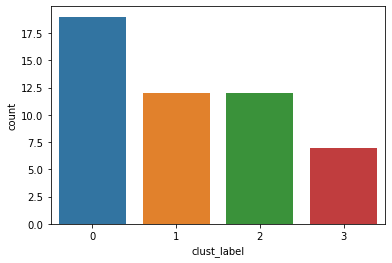

In [104]:
sns.countplot(x="clust_label", data=df2)

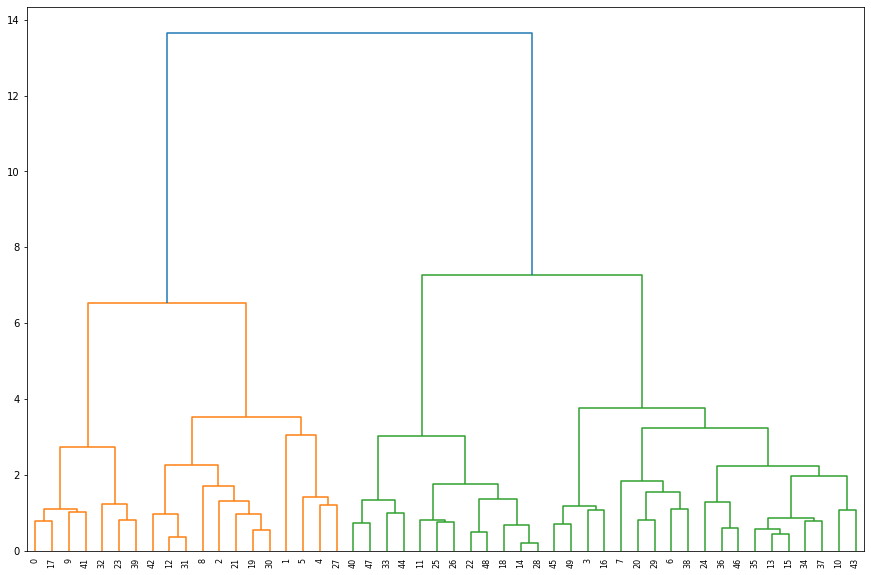

In [106]:
plt.figure(figsize=(15,10))
dendo=sch.dendrogram(sch.linkage(std_df, "ward"))

# using normalized data

In [107]:
norm_df= Normalizer().fit_transform(df1)

In [129]:
agg_clust_norm= AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
clust_label_norm= agg_clust_norm.fit_predict(norm_df)
clust_label1=pd.DataFrame({"clust_label_norm":clust_label_norm})
df3=pd.concat([df1,clust_label1], axis=1)
df3.head()

,Murder,Assault,UrbanPop,Rape,clust_label_norm
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2


<AxesSubplot:xlabel='clust_label_norm', ylabel='count'>

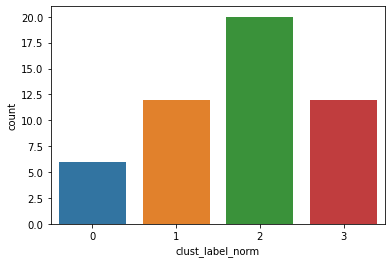

In [130]:
sns.countplot(x= "clust_label_norm", data=df3)

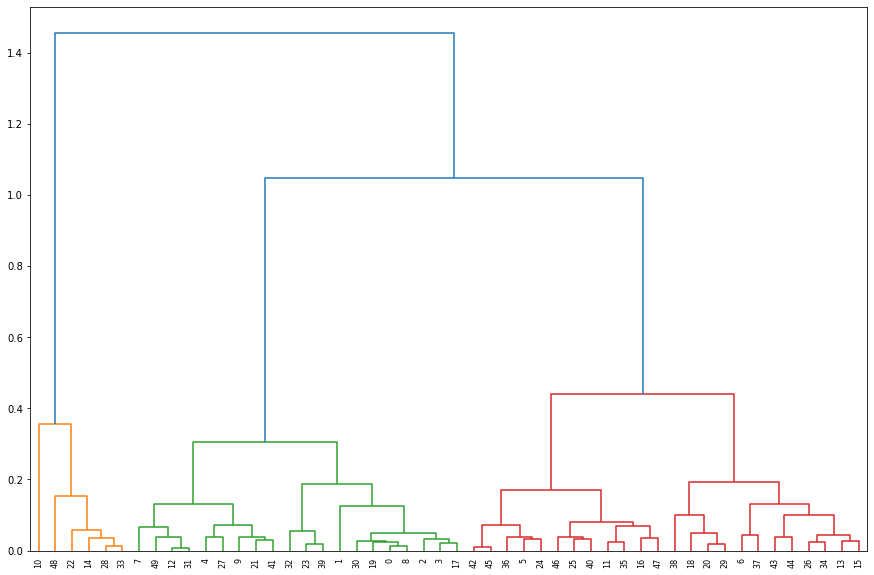

In [131]:
plt.figure(figsize=(15,10))
dendo=sch.dendrogram(sch.linkage(norm_df, "ward"))